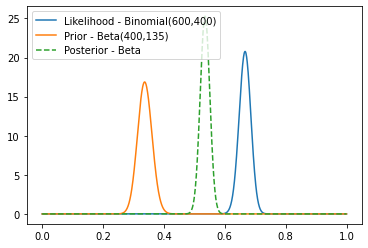

In [14]:
#Load in required modules
from scipy.stats import beta
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

n_trials_prior =400
n_sucesses_prior = 135
n_trials_likelihood = 600
n_successes_likelihood = 400
n_failure_prior = n_trials_prior - n_sucesses_prior

## x-axis for plotting
numSteps = 1000
x = np.linspace(0, 1, numSteps)

## Lin_successeselihood function
likelihood = []
for i in x:
    event = i**n_successes_likelihood * (1 - i)**(n_trials_likelihood - n_successes_likelihood)
    likelihood.append(event)
## Just normalize lin_successeselihood to integrate to one (for purposes of plotting)
likelihood = likelihood / sum(likelihood) * numSteps
##plot Likelihood
plt.plot(x, likelihood)
##Plot Prior
plt.plot(x, beta.pdf(x, n_sucesses_prior, n_failure_prior))
## Plot posterior
plt.plot(x, beta.pdf(x, n_successes_likelihood + n_sucesses_prior, n_trials_likelihood - n_successes_likelihood + n_failure_prior), linestyle='dashed')
## Legend
plt.legend([f"Likelihood - Binomial({n_trials_likelihood},{n_successes_likelihood})", f"Prior - Beta({n_trials_prior},{n_sucesses_prior})", f"Posterior - Beta"])


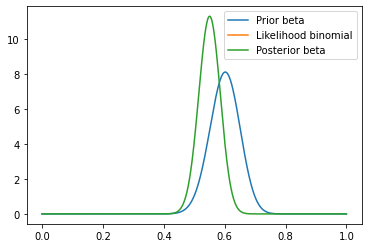

In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Définir la loi de prior bêta
a = 60
b = 40
prior = stats.beta(a, b)

# Définir la fonction de vraisemblance binomiale
n = 100
x = 50
likelihood = stats.binom(n, x)

# Calculer la loi a posteriori bêta
posterior = stats.beta(a + x, b + n - x)

# Tracer les courbes
x_values = np.linspace(0, 1, 500)
plt.plot(x_values, prior.pdf(x_values), label='Prior beta')
plt.plot(x_values, likelihood.pmf(x)*np.ones(len(x_values)), label='Likelihood binomial')
plt.plot(x_values, posterior.pdf(x_values), label='Posterior beta')
plt.legend()
plt.show()


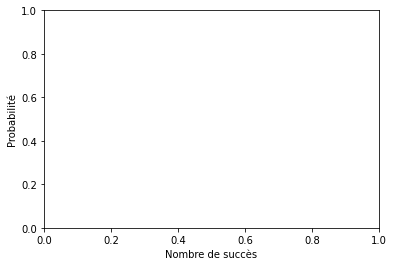

ValueError: x and y must have same first dimension, but have shapes (500,) and (1000,)

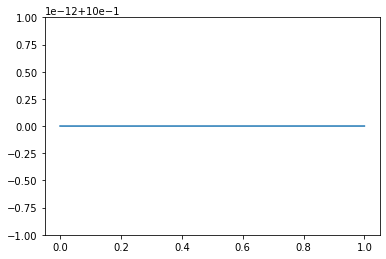

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom

from scipy.interpolate import interp1d




# Effectuer une interpolation linéaire


# Tracer la courbe de la fonction de vraisemblance lissée
plt.xlabel('Nombre de succès')
plt.ylabel('Probabilité')
plt.show()
# Données de l'étude
nombre_essais = 100
nombre_succes = 60
# x-axis pour le tracé
x = np.arange(nombre_essais + 1)

# Calculer la fonction de vraisemblance
likelihood = binom.pmf(x, nombre_essais, nombre_succes/nombre_essais)
f = interp1d(x, likelihood, kind='linear')
x_interp = np.linspace(0, nombre_succes, 1000)
y_interp = f(x_interp)
# Prior
a_prior = 1
b_prior = 1
prior = beta(a_prior, b_prior)

# Likelihood

# Posterior
a_posterior = a_prior + nombre_succes
b_posterior = b_prior + nombre_essais - nombre_succes
posterior = beta(a_posterior, b_posterior)

# Tracer les courbes
x_values = np.linspace(0, 1, 500)
plt.plot(x_values, prior.pdf(x_values), label='Prior beta')
plt.plot(x_values, y_interp, label='binomial likelihood')
plt.plot(x_values, posterior.pdf(x_values), label='Posterior beta')
plt.legend()
plt.show()


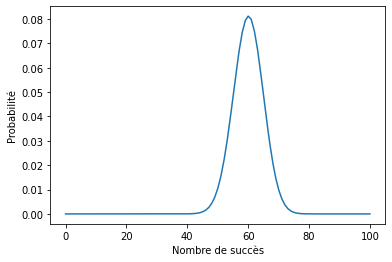